In [ ]:
pip install pycombo

     |████████████████████████████████| 133 kB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached importlib_metadata-1.7.0-py2.py3-none-any.whl (31 kB)
     |████████████████████████████████| 208 kB 44.2 MB/s 
  Created wheel for pycombo: filename=pycombo-0.1.6-cp37-cp37m-manylinux_2_27_x86_64.whl size=97178 sha256=de3a11ae0d1a92b2b469ba3a13ed30c926073638d099be89f92855d0873be827
  Stored in directory: /root/.cache/pip/wheels/7c/17/56/3d9cd1c2914076a218829b1988807f90f872eba515ee40ca1d
Successfully built pycombo
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.8.2
    Uninstalling importlib-metadata-4.8.2:
      Successfully uninstalled importlib-metadata-4.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 

In [ ]:
import pycombo # combo community detection package
import networkx as nx #library supporting networks
from networkx.algorithms import community
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
import numpy as np
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.api as sm
import warnings
#import geopandas as gpd
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ADS midterm/ads/country_partner_hsproduct4digit_year_2014.csv')
df.head()

,location_id,partner_id,product_id,year,export_value,import_value,hs_eci,hs_coi,location_code,partner_code,hs_product_code
0,0,7,833,2014,123032,0,0.815531,-0.292281,ABW,ARE,2204
1,1,7,833,2014,0,81172,-0.907483,-0.827473,AFG,ARE,2204
2,2,7,833,2014,0,115361,-1.816664,-1.150108,AGO,ARE,2204
3,8,7,833,2014,2475957,0,0.101914,0.448220,ARG,ARE,2204
4,14,7,833,2014,12802326,173159,-0.401914,-0.171766,AUS,ARE,2204


In [ ]:
Flights=nx.Graph()
Flights.add_nodes_from(df2.location_code)
CityPos={c:(df2['long. most active airport'][c],cities['lat. most active airport'][c])
         for c in cities.index}

In [ ]:
size(df,0)

5467612

In [ ]:
df2=df.loc[df['product_id']==723]
size(df2,0)

1470

In [ ]:
size(df2['location_id'].unique())

176

In [ ]:
df2=df2.reset_index()
df2.head()

,index,location_id,partner_id,product_id,year,export_value,import_value,hs_eci,hs_coi,location_code,partner_code,hs_product_code
0,4838128,9,7,723,2014,0,14061,-0.201601,-0.592089,ARM,ARE,812
1,4838129,14,7,723,2014,133234,0,-0.401914,-0.171766,AUS,ARE,812
2,4838130,32,7,723,2014,1938,0,0.215985,0.556716,BRA,ARE,812
3,4838131,43,7,723,2014,14084,0,1.188890,1.220658,CHN,ARE,812
4,4838132,61,7,723,2014,17427,0,2.057400,-2.877210,DEU,ARE,812


In [ ]:
loc = pd.read_csv('/content/drive/MyDrive/ADS midterm/ads/worldcities4.csv')
loc.head()

,city,lat,lng,country,iso2,iso3,capital,population,id
0,Oranjestad,12.5186,-70.0358,Aruba,AW,ABW,primary,34980.0,1533513057
1,Kabul,34.5328,69.1658,Afghanistan,AF,AFG,primary,3678034.0,1004993580
2,Luanda,-8.8383,13.2344,Angola,AO,AGO,primary,8417000.0,1024949724
3,The Valley,18.2167,-63.0500,Anguilla,AI,AIA,primary,NaN,1660698387
4,Tirana,41.3300,19.8200,Albania,AL,ALB,primary,418495.0,1008162156


In [ ]:
df2=df2.merge(loc,left_on='location_code',right_on='iso3')
df2.head()

,location_id,partner_id,product_id,year,export_value,import_value,hs_eci,hs_coi,location_code,partner_code,hs_product_code,city,lat,lng,country,iso2,iso3,capital,population,id
0,14,7,723,2014,133234,0,-0.401914,-0.171766,AUS,ARE,812,Canberra,-35.2931,149.1269,Australia,AU,AUS,primary,426704.0,1036142029
1,14,43,723,2014,0,26256,-0.401914,-0.171766,AUS,CHN,812,Canberra,-35.2931,149.1269,Australia,AU,AUS,primary,426704.0,1036142029
2,14,77,723,2014,0,7762,-0.401914,-0.171766,AUS,FRA,812,Canberra,-35.2931,149.1269,Australia,AU,AUS,primary,426704.0,1036142029
3,14,97,723,2014,49365,2755,-0.401914,-0.171766,AUS,HKG,812,Canberra,-35.2931,149.1269,Australia,AU,AUS,primary,426704.0,1036142029
4,14,104,723,2014,0,9725,-0.401914,-0.171766,AUS,IND,812,Canberra,-35.2931,149.1269,Australia,AU,AUS,primary,426704.0,1036142029


Report top nodes by centrality
Print the node labels and corresponding centrality measure for top 5 nodes in terms of

a) degree centrality;

b) betweenness centrality;

c) closeness centrality;

In [ ]:
trades=nx.DiGraph()
nx.set_edge_attributes(trades,'weight', 0)
for k in df2.index:
    trades.add_edge(df2['location_code'][k],df2['partner_code'][k],weight=df2['export_value'][k])

In [ ]:
trades

In [ ]:
trades.number_of_nodes()

176

In [ ]:
trades.number_of_edges()

1425

In [ ]:
G=trades

In [ ]:
degrees = dict(G.degree(G.nodes()))

# save the degrees as a node attribute
nx.set_node_attributes(G, degrees, 'degree')

# check what has been saved
G.nodes.data()

NodeDataView({'AUS': {'degree': 31}, 'ARE': {'degree': 52}, 'CHN': {'degree': 61}, 'FRA': {'degree': 93}, 'HKG': {'degree': 26}, 'IND': {'degree': 55}, 'ITA': {'degree': 99}, 'JPN': {'degree': 34}, 'MYS': {'degree': 57}, 'NLD': {'degree': 95}, 'NZL': {'degree': 24}, 'PER': {'degree': 11}, 'THA': {'degree': 57}, 'USA': {'degree': 127}, 'NRU': {'degree': 1}, 'FJI': {'degree': 6}, 'NCL': {'degree': 4}, 'BRA': {'degree': 39}, 'ARG': {'degree': 16}, 'CAN': {'degree': 35}, 'CHE': {'degree': 20}, 'CHL': {'degree': 24}, 'DEU': {'degree': 117}, 'ESP': {'degree': 97}, 'GBR': {'degree': 86}, 'PRT': {'degree': 26}, 'SGP': {'degree': 40}, 'SUR': {'degree': 12}, 'SVK': {'degree': 14}, 'TUR': {'degree': 45}, 'ROU': {'degree': 40}, 'BOL': {'degree': 8}, 'KOR': {'degree': 16}, 'SAU': {'degree': 26}, 'TWN': {'degree': 25}, 'BGR': {'degree': 47}, 'BHR': {'degree': 26}, 'EGY': {'degree': 28}, 'KGZ': {'degree': 4}, 'MOZ': {'degree': 8}, 'PAK': {'degree': 19}, 'ETH': {'degree': 6}, 'MDG': {'degree': 23}, 'V

In [ ]:
import operator
deg_centrality = nx.degree_centrality(G)
sorted(deg_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:10]

[('USA', 0.7257142857142858),
 ('DEU', 0.6685714285714286),
 ('ITA', 0.5657142857142857),
 ('ESP', 0.5542857142857143),
 ('NLD', 0.5428571428571428),
 ('FRA', 0.5314285714285715),
 ('GBR', 0.49142857142857144),
 ('ZAF', 0.4114285714285714),
 ('AUT', 0.4057142857142857),
 ('CHN', 0.3485714285714286)]

In [ ]:
btwnCent = nx.betweenness_centrality(G, endpoints = False, #include/exclude node v in source/target
                                        normalized = True,
                                        k = 10)  #approximation


sorted(btwnCent.items(), key=operator.itemgetter(1), reverse = True)[0:10]

[('ZAF', 0.45131293597978106),
 ('USA', 0.2082575578202078),
 ('DEU', 0.11692289346105138),
 ('UGA', 0.10403940886699505),
 ('ARE', 0.06988768640769938),
 ('ESP', 0.061986471862009195),
 ('FRA', 0.058979159237603815),
 ('MYS', 0.05296045549118039),
 ('ITA', 0.051623034177971566),
 ('IND', 0.05074991147021297)]

In [ ]:
#c)
close_centrality = nx.closeness_centrality(G)
sorted(close_centrality.items(), key=operator.itemgetter(1), reverse = True)[0:10]

[('USA', 0.5691632653061225),
 ('DEU', 0.5457729941291585),
 ('ITA', 0.5402227602905568),
 ('ESP', 0.5259594530881659),
 ('NLD', 0.5225105386416862),
 ('GBR', 0.5208029878618113),
 ('FRA', 0.5043218806509946),
 ('MYS', 0.48885188431200705),
 ('THA', 0.48885188431200705),
 ('ZAF', 0.48587108013937286)]

In [ ]:
Flights=nx.Graph()
Flights.add_nodes_from(df2.index)
CityPos={c:(df2['lng'][c],df2['lat'][c])
         for c in df2.index}

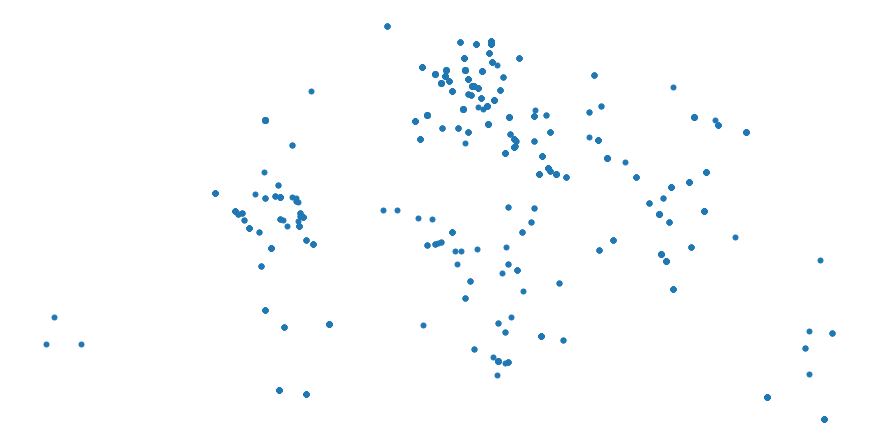

In [ ]:
plt.figure(figsize = (12,6))
nx.draw(Flights,pos=CityPos,with_labels=False,arrows=False,node_size=25)

In [ ]:
EN=len(df2.index)
edgelist=[(df2['location_code'][j],df2['partner_code'][j]) for j in range(EN)]
edgelist[:5]

[('AUS', 'ARE'),
 ('AUS', 'CHN'),
 ('AUS', 'FRA'),
 ('AUS', 'HKG'),
 ('AUS', 'IND')]

In [ ]:
Flights.add_edges_from(edgelist)

NetworkXError: ignored

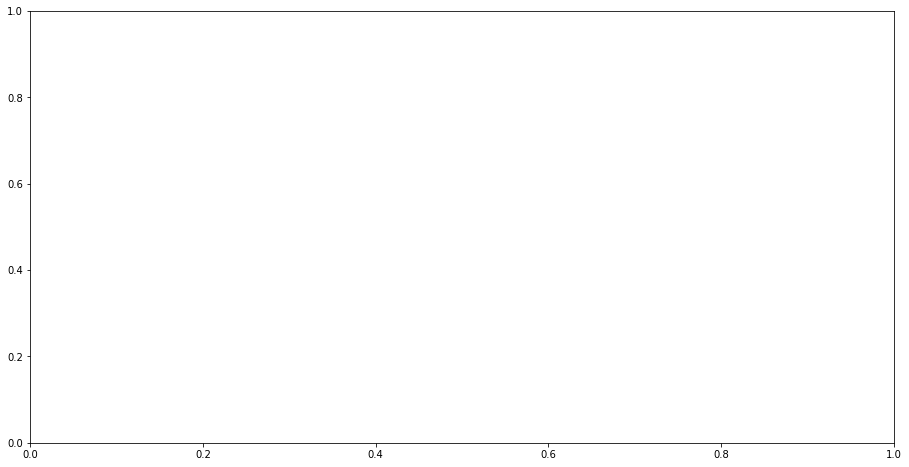

In [ ]:
#visualize the network
plt.figure(figsize = (12,6))
nx.draw(Flights,pos=CityPos,with_labels=False,node_size=15,style='dotted',edge_color='green')

In [ ]:
#most connected airport
AirportDeg=dict(Flights.degree())
TopAirport=list(AirportDeg.keys())[np.argmax(list(AirportDeg.values()))]
print('Most connected airport is {0} with {1} connections'.format(TopAirport,AirportDeg[TopAirport]))

In [ ]:
df2.columns

Index(['location_id', 'partner_id', 'product_id', 'year', 'export_value',
       'import_value', 'hs_eci', 'hs_coi', 'location_code', 'partner_code',
       'hs_product_code', 'city', 'lat', 'lng', 'country', 'iso2', 'iso3',
       'capital', 'population', 'id'],
      dtype='object')